# Numercical Variable 

In [2]:
import pandas as pd
list_of_num_data = [1,9,22,24,32,33,41,44,57,66,70,73,75,76,79,82,87,89,95,100] # created a list of the data
series_of_num_data = pd.Series(list_of_num_data) # converted the list to series
series_of_num_data.value_counts(ascending = True) # the frequency was ascending but not the demand
test = dict(series_of_num_data.value_counts().sort_index())
freq_table =  pd.Series(test)
df=pd.DataFrame({"Dataset":freq_table.index, "Frequency":freq_table.values})
df

,Dataset,Frequency
0,1,1
1,9,1
2,22,1
3,24,1
4,32,1
5,33,1
6,41,1
7,44,1
8,57,1
9,66,1


In [3]:
#setting Maximum value from dataset
max_value = df['Dataset'].max()
max_value

100

In [4]:
#setting Miniimum value from dataset
min_value = df['Dataset'].min()
min_value

1

In [5]:
#inding difference of class inerval assume value 5 for no of classes
desired_interval = 5
width_of_interval = round((max_value - min_value)/desired_interval)
width_of_interval

20

In [6]:
r_val_list = []
l_val_list = []
right_val = df['Dataset'][0]
for i in range(desired_interval):
    right_val += width_of_interval
    r_val_list.append(right_val)
    left_val =right_val-width_of_interval
    l_val_list.append(left_val)
l_val_series=pd.Series(l_val_list)
r_val_series=pd.Series(r_val_list)

In [7]:
df=pd.DataFrame({'Interval Start':l_val_series,'Interval end':r_val_series})
df

,Interval Start,Interval end
0,1,21
1,21,41
2,41,61
3,61,81
4,81,101


In [8]:
bins = [0,21,41,61,81,101]
cats=pd.cut(list_of_num_data,bins)
abs_freq=pd.Series(pd.value_counts(cats).sort_index())
abs_freq.index=[0,1,2,3,4]
rel_freq=pd.Series(abs_freq.values/20)
final_df=pd.DataFrame({'Interval':cats.categories,'Absolute frequency':abs_freq,'Relative Frequency':rel_freq})
final_df

,Interval,Absolute frequency,Relative Frequency
0,"(0, 21]",2,0.10
1,"(21, 41]",5,0.25
2,"(41, 61]",2,0.10
3,"(61, 81]",6,0.30
4,"(81, 101]",5,0.25


# numerical data excercise

In [9]:
import pandas as pd
list_of_num_data1 = [8,30,30,50,86,94,102,110,169,170,176,236,240,241,242,255,262,276,279,282]
# created a list of the data
series_of_num_data = pd.Series(list_of_num_data1) # converted the list to series
series_of_num_data.value_counts(ascending = True) # the frequency was ascending but not the demand
test = dict(series_of_num_data.value_counts().sort_index())
freq_table =  pd.Series(test)
df=pd.DataFrame({"Dataset":freq_table.index, "Frequency":freq_table.values})
df

,Dataset,Frequency
0,8,1
1,30,2
2,50,1
3,86,1
4,94,1
5,102,1
6,110,1
7,169,1
8,170,1
9,176,1


# CATEGORICAL DATA EXCERCISE

In [10]:
df2 = pd.DataFrame({'Frequency':[12327,17129,19923]},index=['New York','LA','San Francisco'])
df2

,Frequency
New York,12327
LA,17129
San Francisco,19923


In [11]:
df2.columns.name='Ordered'


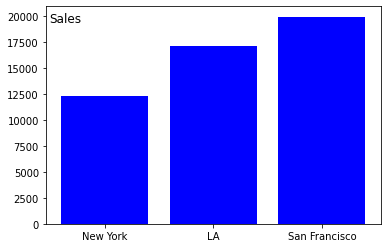

In [12]:
# df2.plot(kind='bar')
import matplotlib.pyplot as plt
y=df2['Frequency'].sort_values(ascending=True)
x=[1,2,3]
plt.title("Sales",loc='left',x=0.01,y=0.9)
labels = list(df2.index)
plt.bar(x,y,color='blue')
plt.xticks(x,labels)
# plt.legend(loc='upper right')
plt.show()

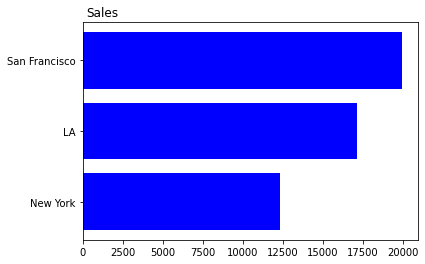

In [13]:
y=df2['Frequency'].sort_values(ascending=True)
x=[1,2,3]
plt.title("Sales",loc='left',x=0.01,y=1)
labels = list(df2.index)
plt.barh(x,y,color='blue')
plt.yticks(x,labels)
# plt.legend(loc='upper right')
plt.show()

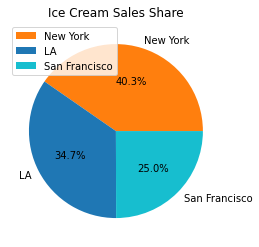

In [14]:
#pie Chart
total = df2['Frequency'].sum()
percent_New_york_sales =(df2['Frequency']['New York']*100)/total
percent_LA_sales =(df2['Frequency']['LA']*100)/total
percent_San_sales =(df2['Frequency']['San Francisco']*100)/total
labels=list(df2.index)
plt.title("Ice Cream Sales Share")
plt.pie([percent_San_sales,percent_LA_sales,percent_New_york_sales], labels=labels, autopct='%1.1f%%',colors=['C21','C10','C9'])
plt.legend(loc='upper left')
plt.show()


In [15]:
Rel_freq_series=round(pd.Series((df2['Frequency']*100)/df2['Frequency'].sum()))
Rel_freq_series


New York         25.0
LA               35.0
San Francisco    40.0
Name: Frequency, dtype: float64

In [16]:
df2 = pd.DataFrame({'Frequency':[19923,17129,12327],'Relative Frequency':Rel_freq_series},index=['San Francisco','LA','New York'])
df2.columns.name = "Ordered"
df2

Ordered,Frequency,Relative Frequency
San Francisco,19923,40.0
LA,17129,35.0
New York,12327,25.0


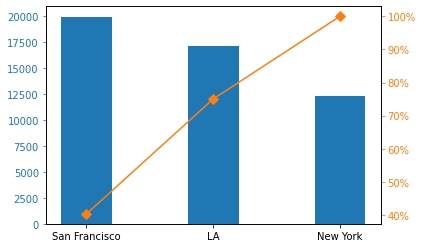

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


# df = pd.DataFrame({'country': [177.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0]})
# df.index = ['USA', 'Canada', 'Russia', 'UK', 'Belgium', 'Mexico', 'Germany', 'Denmark']
# df = df.sort_values(by='country',ascending=False)
df2["Absolute frequency"] = df2["Frequency"].cumsum()/df2['Frequency'].sum()*100


fig, ax = plt.subplots()
ax.bar(df2.index, df2["Frequency"],width=0.4,color="C0")
ax2 = ax.twinx()
ax2.plot(df2.index, df2["Absolute frequency"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

# Cross Table

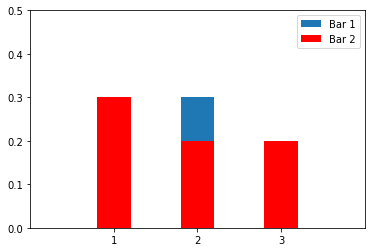

In [25]:
import matplotlib.pyplot as plt

gridnumber = range(1,4)

b1 = plt.bar(gridnumber, [0.2, 0.3, 0.1], width=0.4,
                label="Bar 1", align="center")

b2 = plt.bar(gridnumber, [0.3, 0.2, 0.2], color="red", width=0.4,
                label="Bar 2", align="center")


plt.ylim([0,0.5])
plt.xlim([0,4])
plt.xticks(gridnumber)
plt.legend()
plt.show()

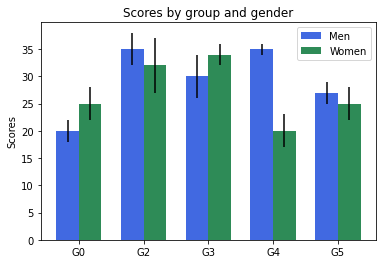

In [27]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

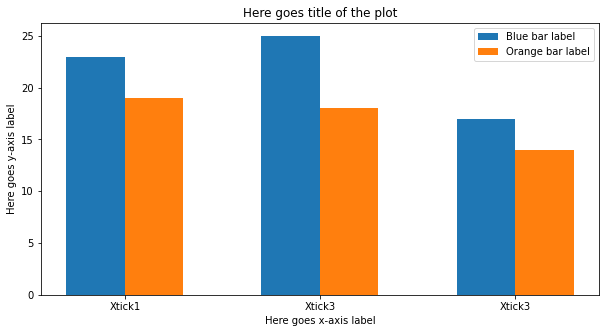

In [28]:
# Numbers of pairs of bars you want
N = 3

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Blue bar label')
plt.bar(ind + width, orange_bar, width, label='Orange bar label')

plt.xlabel('Here goes x-axis label')
plt.ylabel('Here goes y-axis label')
plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Xtick1', 'Xtick3', 'Xtick3'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()